Import the libraries

In [59]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import norm
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Read the data

In [70]:
data = loadmat("data.mat")
xVal = data['X']
x = data['Xval']
y = data['yval']

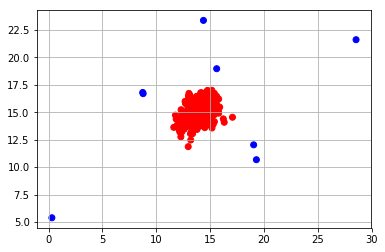

In [77]:
color = []
colors = anom

def setColor(mylist, colorlist):
    for i in mylist:
        if i==0:
            colorlist.append('r')
        else: 
            colorlist.append('b')

setColor(colors, color)

def plotData(X):
    dx, dy = X.T
    plt.grid()
    plt.scatter(dx, dy, color=color)
plotData(x)

Plot the data

Find outliers and color them in red. You need to choose your own epsilon

In [80]:
mean = lambda x : sum(x) / len(x)
def standard(x):
    std = 0
    for i in x:
        std += ((i - mean(x))**2)/len(x)
    return std

def p(i, mean, std):
    prob = (1/math.sqrt(2*math.pi)*std)*(np.exp((-(i-mean)**2)/2*std))
    return prob

eps = 0.000001
anom = []
for i,j in zip(x[:, 0], x[:, 1]):
    mean1 = mean(x[:, 0])
    mean2 = mean(x[:, 1])
    std1 = standard(x[:, 0])
    std2 = standard(x[:, 1])
    prob = p(i, mean1, std1) * p(j, mean2, std2)
    if prob < eps:
        anom.append(1)
    else:
        anom.append(0)

In [79]:
f1_score(y, anom)

0.823529411764706